In [40]:
import os
import numpy as np
import pandas as pd
import re
from sklearn import linear_model

## Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2016-2021 cleaned data

In [41]:
rawdata16 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2016', skiprows=1) # , skiprows=4
# print(rawdata16.columns, '\n')
# print(rawdata16.dtypes)
summary16 = rawdata16.describe()
summary16

,FIPS,Population,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,...,% Single-Parent Households,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch,Food Environment Index,% With Access,% Food Insecure
count,3136.000000,3.136000e+03,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,3136.000000,...,3135.000000,3136.000000,2966.000000,3136.000000,3136.000000,3135.000000,3132.000000,3136.000000,3063.000000,3136.000000
mean,30437.588010,1.024858e+05,22.433643,17.992518,8.963846,2.207399,1.458448,9.191828,76.829182,1.776770,...,32.616667,13.799723,245.457958,14.476977,8.364178,48592.810207,53.880600,7.023980,59.301563,14.670695
std,15126.729013,3.294964e+05,3.430113,4.518555,14.257508,7.343269,2.794959,13.586565,19.897520,2.915379,...,10.325037,7.010967,190.330092,4.745234,8.185084,12356.655600,17.079775,1.262887,24.321447,4.138187
min,1001.000000,8.900000e+01,0.000000,4.292752,0.000000,0.000000,0.000000,0.205339,3.216303,0.000000,...,0.000000,0.000000,0.000000,0.987654,0.000000,22894.000000,0.000000,0.000000,0.000000,4.300000
25%,19002.500000,1.104250e+04,20.421409,15.082699,0.673134,0.346767,0.419756,2.132103,65.148454,0.295866,...,26.062161,9.315527,112.746325,11.403148,3.445351,40393.000000,42.230675,6.400000,43.297433,12.000000
50%,29182.000000,2.576350e+04,22.356256,17.688139,2.205855,0.593651,0.680680,4.020759,84.132147,0.750923,...,31.807184,12.551852,198.145885,13.967875,6.152361,46788.000000,52.874574,7.300000,62.128566,14.200000
75%,45083.500000,6.787250e+04,24.176368,20.406146,10.190465,1.268387,1.330484,9.440886,92.885907,1.935821,...,38.137733,16.582123,325.422146,16.826600,10.323625,54140.500000,64.074630,7.900000,77.300077,16.800000
max,56045.000000,1.017029e+07,40.706898,54.804821,84.454509,91.289223,42.164624,95.824124,98.357290,31.142654,...,100.000000,68.681319,1717.731948,61.582569,72.274456,125900.000000,100.000000,10.000000,100.000000,37.500000


In [42]:
rawdata17 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2017', skiprows=1).iloc[:3142]
rawdata17 = rawdata17.fillna(0)

# print(rawdata17.columns, '\n')
# print(rawdata17.dtypes)

cols17 = rawdata17.columns[3:]

for i in cols17:
    rawdata17[i] = pd.to_numeric(rawdata17[i], errors='coerce')

# print(rawdata17.dtypes)
summary17 = rawdata17.describe()
summary17

,FIPS,Population,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,...,% Single-Parent Households,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch,Food Environment Index,% With Access,% Food Insecure
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3141.000000,3142.000000,2966.000000,3142.000000,3123.000000,3141.000000,3123.000000,3123.000000,3136.000000,3142.000000
mean,30383.649268,1.028413e+05,22.342362,18.387078,8.942011,2.309484,1.485328,9.289688,76.584564,1.756938,...,32.651385,13.771738,245.453136,14.467537,8.644893,49522.113976,54.528658,7.408421,62.992028,14.194462
std,15162.508374,3.303191e+05,3.477153,4.573222,14.311069,7.720925,2.860106,13.662563,20.087368,2.926198,...,10.436024,7.047972,190.329042,4.796933,8.380700,12887.309622,17.938969,1.186207,23.189427,4.243173
min,1001.000000,8.800000e+01,0.000000,4.600000,0.000000,0.000000,0.000000,0.500000,2.800000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,22045.000000,0.000000,0.000000,0.000000,3.000000
25%,18177.500000,1.097550e+04,20.300000,15.500000,0.700000,0.400000,0.400000,2.200000,64.900000,0.300000,...,26.000000,9.300000,113.000000,11.000000,4.000000,41072.000000,42.000000,6.900000,49.000000,11.000000
50%,29176.000000,2.577100e+04,22.300000,18.100000,2.200000,0.600000,0.700000,4.100000,84.000000,0.700000,...,32.000000,12.500000,198.000000,14.000000,7.000000,47589.000000,53.000000,7.600000,66.000000,14.000000
75%,45080.500000,6.749050e+04,24.100000,20.800000,10.100000,1.300000,1.400000,9.400000,92.700000,1.900000,...,38.000000,16.500000,325.000000,17.000000,11.000000,55308.000000,65.000000,8.200000,80.000000,16.000000
max,56045.000000,1.013792e+07,40.800000,56.300000,85.200000,93.100000,44.300000,96.300000,98.000000,32.700000,...,100.000000,68.300000,1718.000000,70.000000,72.000000,134609.000000,100.000000,10.000000,100.000000,38.000000


In [43]:
rawdata18 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2018', skiprows=1)
# print(rawdata18.columns, '\n')
# print(rawdata18.dtypes)

cols18 = rawdata18.columns[3:]

for i in cols18:
    rawdata18[i] = pd.to_numeric(rawdata18[i], errors='coerce')

# print(rawdata18.dtypes)
summary18 = rawdata18.describe()
summary18

,FIPS,Population,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,...,% Free or Reduced Lunch,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch.1,Food Environment Index,% With Access,% Food Insecure
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3021.000000,3142.000000,2951.000000,3142.000000,3123.000000,3141.000000,3021.000000,3123.000000,3136.000000,3142.000000
mean,30383.649268,1.036662e+05,22.234755,18.814131,8.967409,2.330331,1.527116,9.477658,76.285933,1.698281,...,53.556107,13.783641,251.902406,14.237428,8.644893,51090.529449,53.556107,7.465738,62.905931,13.747931
std,15162.508374,3.330502e+05,3.463903,4.617174,14.309395,7.734848,2.911875,13.754451,20.150028,2.936772,...,18.383495,7.058226,192.505391,4.684061,8.380700,13497.965734,18.383495,1.165679,23.099295,4.190785
min,1001.000000,8.800000e+01,0.000000,4.800000,0.000000,0.000000,0.000000,0.500000,2.800000,0.000000,...,0.000000,0.000000,0.000000,3.000000,0.000000,22679.000000,0.000000,0.000000,0.000000,4.000000
25%,18177.500000,1.089975e+04,20.200000,15.800000,0.700000,0.400000,0.400000,2.300000,64.525000,0.000000,...,41.000000,9.325000,118.000000,11.000000,4.000000,42275.000000,41.000000,6.900000,49.000000,11.000000
50%,29176.000000,2.583850e+04,22.200000,18.500000,2.200000,0.600000,0.700000,4.300000,83.700000,1.000000,...,52.000000,12.600000,205.000000,14.000000,7.000000,48885.000000,52.000000,7.700000,66.000000,13.000000
75%,45080.500000,6.771750e+04,24.000000,21.300000,10.200000,1.300000,1.400000,9.700000,92.500000,2.000000,...,64.000000,16.500000,335.000000,16.000000,11.000000,56696.000000,64.000000,8.200000,80.000000,16.000000
max,56045.000000,1.016351e+07,41.200000,56.900000,85.300000,92.700000,43.000000,96.300000,97.900000,35.000000,...,100.000000,70.600000,1820.000000,71.000000,72.000000,136191.000000,100.000000,10.000000,100.000000,36.000000


In [44]:
rawdata19 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2019', skiprows=1)
# print(rawdata19.columns, '\n')
# print(rawdata19.dtypes)

cols19 = rawdata19.columns[3:]

for i in cols19:
    rawdata19[i] = pd.to_numeric(rawdata19[i], errors='coerce')

# print(rawdata19.dtypes)

summary19 = rawdata19.describe()
summary19

,FIPS,Population,% less than 18 years of age,% 65 and over,% Black,% American Indian & Alaska Native,% Asian,% Native Hawaiian/Other Pacific Islander,% Hispanic,% Non-Hispanic White,...,% Single-Parent Households,Social Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access to Healthy Foods,Median Household Income,% Enrolled in Free or Reduced Lunch,Food Environment Index,% With Access to Exercise Opportunities,% Food Insecure
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3140.000000,3142.000000,2951.000000,3142.000000,3123.000000,3141.000000,3020.000000,3123.000000,3136.000000,3142.000000
mean,30383.649268,1.041271e+05,22.070947,19.267468,8.993229,2.354039,1.568875,0.141478,9.652950,75.992528,...,32.363979,11.665314,251.909300,13.869071,8.651256,52794.413244,53.908793,7.451361,62.814046,13.250668
std,15162.508374,3.334863e+05,3.479507,4.707189,14.298928,7.728629,2.952486,0.967850,13.836804,20.193845,...,10.655360,5.914841,192.512209,4.575075,8.368703,13880.120635,18.641568,1.145375,23.365773,3.960356
min,1001.000000,8.800000e+01,0.000000,4.829652,0.000000,0.000000,0.000000,0.000000,0.610451,2.691288,...,0.000000,0.000000,0.000000,3.220339,0.000000,25385.000000,0.000000,0.000000,0.000000,2.900000
25%,18177.500000,1.092650e+04,20.031446,16.246008,0.708668,0.384419,0.465722,0.031907,2.400485,64.311411,...,25.515182,8.207040,117.635602,11.007212,3.625438,43681.000000,41.226183,6.900000,48.507356,10.600000
50%,29176.000000,2.575850e+04,22.077769,18.917752,2.227342,0.641548,0.739402,0.062049,4.400503,83.373503,...,31.661350,11.118943,204.558847,13.329063,6.508531,50568.000000,52.464072,7.600000,65.844542,12.800000
75%,45080.500000,6.782050e+04,23.853619,21.804771,10.210945,1.333396,1.435050,0.118756,9.999429,92.295823,...,37.692141,14.546262,334.927059,15.921320,10.679796,58848.000000,64.063826,8.200000,80.167515,15.200000
max,56045.000000,1.010552e+07,41.991637,57.587337,85.414352,92.515200,43.357041,48.863636,96.359551,97.887219,...,87.203791,52.313883,1819.514406,70.893372,71.844209,140382.000000,100.000000,10.000000,100.000000,36.300000


In [45]:
rawdata20 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2020', skiprows=1)
# print(rawdata20.columns, '\n')
# print(rawdata19.dtypes)

cols20 = rawdata20.columns[3:]

for i in cols20:
    rawdata20[i] = pd.to_numeric(rawdata20[i], errors='coerce')

# print(rawdata20.dtypes)

summary20 = rawdata20.describe()
summary20

,FIPS,Population,% Less Than 18 Years of Age,% 65 and Over,% Black,% American Indian & Alaska Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,...,% Children in Single-Parent Households,Social Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access to Healthy Foods,Median Household Income,% Enrolled in Free or Reduced Lunch,Food Environment Index,% With Access to Exercise Opportunities,% Food Insecure
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3141.000000,3142.000000,2951.000000,3142.000000,3123.000000,3141.000000,3022.000000,3123.000000,3136.000000,3142.000000
mean,30383.649268,1.044683e+05,21.927022,19.757315,9.008807,2.384658,1.578008,9.773804,75.787488,1.692754,...,24.405938,11.566425,251.909300,13.588484,8.651256,55713.460045,54.311325,7.445821,62.814046,13.195449
std,15162.508374,3.334567e+05,3.483715,4.809066,14.281730,7.762201,2.958020,13.867424,20.217156,2.799401,...,9.979555,5.934706,192.512209,4.511387,8.368703,14490.231661,18.605208,1.150772,23.365773,3.762502
min,1001.000000,8.600000e+01,0.000000,4.859265,0.000000,0.000000,0.000000,0.647807,2.685535,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,24732.000000,0.000000,0.000000,0.000000,3.600000
25%,18177.500000,1.090250e+04,19.876976,16.682801,0.747111,0.398297,0.477454,2.469927,64.055682,0.288872,...,17.969116,8.106126,117.635602,10.838745,3.625438,46243.000000,41.949777,6.900000,48.507356,10.600000
50%,29176.000000,2.572600e+04,21.951141,19.401980,2.229758,0.661062,0.752469,4.478325,83.149442,0.723205,...,22.865652,10.974203,204.558847,13.012298,6.508531,53341.000000,52.410599,7.600000,65.844542,13.000000
75%,45080.500000,6.807275e+04,23.756445,22.303587,10.235184,1.353577,1.450783,10.144264,92.132015,1.848329,...,29.072682,14.342746,334.927059,15.667799,10.679796,62059.000000,64.350892,8.200000,80.167515,15.600000
max,56045.000000,1.003911e+07,41.682225,58.173992,85.870049,92.410392,43.362301,96.353256,97.831795,34.443387,...,75.098592,55.555556,1819.514406,69.142857,71.844209,151806.000000,100.000000,10.000000,100.000000,30.400000


In [46]:
rawdata21 = pd.read_excel('2016-2021 Cleaned Data.xlsx', '2021', skiprows=1)
# print(rawdata21.columns, '\n')

cols21 = rawdata21.columns[3:]

for i in cols21:
    rawdata21[i] = pd.to_numeric(rawdata21[i], errors='coerce')

# print(rawdata21.dtypes)

summary21 = rawdata21.describe()
summary21

,FIPS,Population,% Less Than 18 Years of Age,% 65 and Over,% African American,% American Indian & Alaska Native,% Asian,% Hispanic,% Non-Hispanic white,% Not Proficient in English,...,% Children in Single-Parent Households,Social Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access to Healthy Foods,Median Household Income,% Enrolled in Free or Reduced Lunch,Food Environment Index,% With Access to Exercise Opportunities,% Food Insecure
count,3142.000000,3.142000e+03,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,3142.000000,...,3141.000000,3142.000000,2951.000000,3142.000000,3109.000000,3140.000000,3089.000000,3109.000000,3066.000000,3142.000000
mean,30383.649268,1.048645e+05,21.826003,20.230108,9.020656,2.415309,1.622151,9.934055,75.520815,1.584978,...,24.172875,11.454297,251.902406,13.365691,8.526536,57455.856688,54.387828,7.446607,55.141226,13.149905
std,15162.508374,3.333232e+05,3.504702,4.885544,14.276161,7.769408,3.016598,13.918796,20.271484,2.725288,...,10.123145,5.906276,192.505391,4.420252,7.423246,14582.812140,18.789220,1.145940,23.842495,3.735458
min,1001.000000,8.700000e+01,0.000000,4.900000,0.000000,0.000000,0.000000,0.600000,2.700000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,22901.000000,1.000000,0.000000,0.000000,3.000000
25%,18177.500000,1.089775e+04,19.800000,17.100000,0.800000,0.400000,0.500000,2.600000,63.600000,0.000000,...,18.000000,8.000000,118.000000,11.000000,4.000000,47821.500000,42.000000,6.800000,39.250000,11.000000
50%,29176.000000,2.562050e+04,21.900000,19.800000,2.300000,0.700000,0.800000,4.700000,82.800000,1.000000,...,23.000000,10.900000,205.000000,13.000000,7.000000,55143.500000,53.000000,7.600000,57.000000,13.000000
75%,45080.500000,6.823675e+04,23.600000,22.900000,10.100000,1.400000,1.500000,10.300000,91.900000,2.000000,...,29.000000,14.300000,335.000000,15.000000,11.000000,64051.000000,64.000000,8.200000,73.000000,16.000000
max,56045.000000,9.943046e+06,41.900000,59.100000,85.600000,92.500000,43.900000,96.300000,97.600000,32.000000,...,76.000000,55.400000,1820.000000,70.000000,63.000000,160305.000000,100.000000,10.000000,100.000000,29.000000


In [47]:
# print(os.getcwd())
# with pd.ExcelWriter("16-21 summary.xlsx") as writer:
#     summary16.to_excel(writer, sheet_name='2016')
#     summary17.to_excel(writer, sheet_name='2017')
#     summary18.to_excel(writer, sheet_name='2018')
#     summary19.to_excel(writer, sheet_name='2019')
#     summary20.to_excel(writer, sheet_name='2020')
#     summary21.to_excel(writer, sheet_name='2021')

In [48]:
summary = np.concatenate([summary16.iloc[1, 2:].to_numpy().reshape([1, len(summary16.iloc[1, 2:])])
                , summary17.iloc[1, 2:].to_numpy().reshape([1, len(summary17.iloc[1, 2:])])
                , summary18.iloc[1, 2:].to_numpy().reshape([1, len(summary18.iloc[1, 2:])])
                , summary19.iloc[1, 2:].to_numpy().reshape([1, len(summary18.iloc[1, 2:])])
                , summary20.iloc[1, 2:].to_numpy().reshape([1, len(summary18.iloc[1, 2:])])
                , summary21.iloc[1, 2:].to_numpy().reshape([1, len(summary18.iloc[1, 2:])])]
                , axis=0)

cols = list(cols17).copy()
cols.pop(0)
summary = pd.DataFrame(summary, columns = cols
                       ,index = ['2016', '2017', '2018', '2019', '2020', '2021'])
summary

,% < 18,% 65 and over,% African American,% American Indian/Alaskan Native,% Asian,% Hispanic,% Non-Hispanic White,% Not Proficient in English,% Female,% Rural,...,% Single-Parent Households,Association Rate,Violent Crime Rate,% Severe Housing Problems,% Limited Access,Household Income,% Free or Reduced Lunch,Food Environment Index,% With Access,% Food Insecure
2016,22.433643,17.992518,8.963846,2.207399,1.458448,9.191828,76.829182,1.776770,49.914333,58.588819,...,32.616667,13.799723,245.457958,14.476977,8.364178,48592.810207,53.880600,7.023980,59.301563,14.670695
2017,22.342362,18.387078,8.942011,2.309484,1.485328,9.289688,76.584564,1.756938,49.899332,58.582648,...,32.651385,13.771738,245.453136,14.467537,8.644893,49522.113976,54.528658,7.408421,62.992028,14.194462
2018,22.234755,18.814131,8.967409,2.330331,1.527116,9.477658,76.285933,1.698281,49.893762,58.582648,...,53.556107,13.783641,251.902406,14.237428,8.644893,51090.529449,53.556107,7.465738,62.905931,13.747931
2019,22.070947,19.267468,8.993229,2.354039,1.568875,0.141478,9.652950,75.992528,49.885376,58.581996,...,32.363979,11.665314,251.909300,13.869071,8.651256,52794.413244,53.908793,7.451361,62.814046,13.250668
2020,21.927022,19.757315,9.008807,2.384658,1.578008,9.773804,75.787488,1.692754,49.884153,58.581996,...,24.405938,11.566425,251.909300,13.588484,8.651256,55713.460045,54.311325,7.445821,62.814046,13.195449
2021,21.826003,20.230108,9.020656,2.415309,1.622151,9.934055,75.520815,1.584978,49.896849,58.582648,...,24.172875,11.454297,251.902406,13.365691,8.526536,57455.856688,54.387828,7.446607,55.141226,13.149905


In [49]:
# print(os.getcwd())
# with pd.ExcelWriter("16-21 summary final.xlsx") as writer:
#     summary.to_excel(writer)

# 
# Data cleaning
- #### Replace empty cells with average

In [50]:
def cleaning(rawdata):
    data = rawdata.fillna(0) # Fill empty cells 0
    fsc = data.iloc[:, :4].values
    x = data.iloc[:, 4:-1].values
    y = data.iloc[:, -1].values
    names = data.columns[:]
    fsc_name = names[0:4] # FIPS, State, County, Population
    x_name = names[4:-1]
    y_name = names[-1] # % Food Insecure 

    ## Convert 0 to Average
    for r in range(x.T.shape[0]):
        avg = x.T[r].mean()
        x.T[r][x.T[r] == 0] = avg
    
    x = StandardScaler().fit_transform(x) # Standardizing the features
    y_avg = y.mean()
    y[y == 0] = y_avg
    y = y.reshape([len(y), 1])
    
    Data = np.concatenate([fsc, x, y.reshape([len(y), 1])], axis=1)
                   
    df = pd.DataFrame(Data, columns = names)._convert(numeric=True)
    
#     x = StandardScaler().fit_transform(x)
    return x, y, names, df

In [51]:
x16, y16, col16, df16 = cleaning(rawdata16)
x17, y17, col17, df17 = cleaning(rawdata17)
x18, y18, col18, df18 = cleaning(rawdata18)
x19, y19, col19, df19 = cleaning(rawdata19)
x20, y20, col20, df20 = cleaning(rawdata20)
x21, y21, col21, df21 = cleaning(rawdata21)

In [52]:
# print(os.getcwd())
# with pd.ExcelWriter("16-21 cleaned data.xlsx") as writer:
#     df16.to_excel(writer, sheet_name='2016')
#     df17.to_excel(writer, sheet_name='2017')
#     df18.to_excel(writer, sheet_name='2018')
#     df19.to_excel(writer, sheet_name='2019')
#     df20.to_excel(writer, sheet_name='2020')
#     df21.to_excel(writer, sheet_name='2021')

# PCA

In [53]:
## Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
principalComponents = pca.fit_transform(x16, StandardScaler().fit_transform(y16))
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3', 'principal component 4', 'principal component 5'])

principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5
0,0.448543,-0.133076,-1.007473,-1.234862,1.257554
1,-0.887423,0.265171,-0.836106,0.042085,-0.599725
2,7.451565,-0.758730,-0.626838,0.000356,0.620654
3,2.841441,-1.776914,-0.908223,-1.593952,0.499178
4,1.052500,-2.165973,-0.321486,-2.671325,-0.526396
...,...,...,...,...,...
3131,-2.911280,1.610125,-0.536736,-2.529001,1.129242
3132,-6.552494,3.609509,0.387178,1.813234,-0.945203
3133,-2.033156,0.513069,-0.172844,-1.662431,0.937357
3134,-2.080318,-0.431786,0.538784,-0.368157,-0.319522


# Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

In [55]:
def lr(x, y):
    x = StandardScaler().fit_transform(x) # Standardizing the features
    reg = linear_model.LinearRegression()
    reg.fit(x, y)
    
    return reg.coef_, reg.intercept_
    
    

In [56]:
coef16, intercept16 = lr(x16, y16)
print(coef16, '\n\n',intercept16)

[[-2.70879359e-02 -1.20123363e-01 -2.27522738e-01 -2.28163283e-01
  -3.92738233e-02 -5.05939518e-01 -3.98893967e-01 -6.34978889e-02
  -2.11679902e-02  3.22467949e-02 -8.96819639e-02 -7.64926989e-02
  -2.49056067e-02 -9.78887412e-02 -3.95807900e-02  2.11006896e-01
   4.90603908e-01 -2.59871309e-01  7.28106483e-02 -9.62367827e-03
  -1.00668086e-01  1.13714739e-01 -2.40666190e-02  5.22818304e-03
   6.84687894e-02  1.98334198e-01  2.62798451e-02  4.90520426e-02
  -2.61945703e-02 -6.42537125e-03  3.95557345e-02 -3.36709277e+00
  -1.33022928e-03  1.83922707e-03 -5.07154983e+00  3.93427086e-02]] 

 [14.67069515]


In [57]:
coef17, intercept17 = lr(x17, y17)
print(coef17, '\n\n',intercept17)

[[-0.04754685 -0.16642751  0.1946612  -0.04227477  0.09398661 -0.33324466
   0.03758607 -0.13881126 -0.01546102  0.00980636  0.05264815 -0.08876472
  -0.08453686 -0.11199481 -0.02223954  0.14366482  0.05880659  0.18715628
   0.10899506 -0.01825829 -0.18078734  0.10827027 -0.05877641 -0.04484518
   0.12133975  0.19427573  0.11560991  0.05472319 -0.02194459  0.00672912
   0.20154901 -2.95783128 -0.13049923  0.03585845 -4.70887296 -0.01557653]] 

 [14.19446213]


In [58]:
coef18, intercept18 = lr(x18, y18)
print(coef18, '\n\n',intercept18)

[[-2.07660609e-02 -1.78995286e-01  1.94044078e-01 -8.42544236e-02
   8.58601892e-02 -4.64979789e-01 -1.47760495e-01 -1.11083031e-01
  -5.50825098e-03  2.54690734e-03  1.65664620e-01 -1.13874545e-01
  -7.22971207e-02 -6.66201739e-02  9.32076900e-04  5.16288832e-02
  -7.25198549e-03  2.34593581e-01  2.64363569e-02 -1.47460836e-02
  -1.58142176e-01  1.36679838e-01 -4.75709422e-02 -7.91834060e-03
   1.76378619e-01  2.43761435e-01  1.31702971e-01 -1.40449917e+12
  -3.46357723e-02  1.94042713e-02  1.24084485e-01 -2.83959845e+00
  -2.50995402e-01  1.40449917e+12 -4.55795673e+00 -6.67226657e-03]] 

 [13.74793125]


In [59]:
coef19, intercept19 = lr(x19, y19)
print(coef19, '\n\n',intercept19)

coef20, intercept20 = lr(x20, y20)
print(coef20, '\n\n',intercept20)

coef21, intercept21 = lr(x21, y21)
print(coef20, '\n\n',intercept20)

[[-1.68608261e-02 -1.20063522e-01  6.28325827e-01  3.17458231e-01
   1.08041649e-01  1.18470508e-01  1.30437612e-01  6.03774766e-01
  -1.27788194e-02 -5.10941661e-02 -1.40442706e-02 -1.77291459e-01
   2.38283042e-02 -3.37315572e-02 -9.47366471e-03  3.11866213e-02
   2.92241391e-01  1.21884444e-01 -2.04975035e-02 -3.63877994e-02
  -1.08164521e-01  1.14674617e-01 -2.10671856e-02 -7.08089307e-03
   8.66853011e-02  1.37601446e-01  6.86511320e-02  8.44004360e-02
  -1.67149345e-04  1.65825362e-02  4.99555595e-02 -3.08416559e+00
  -1.91821347e-01 -1.12094782e-01 -4.83921776e+00  3.53725392e-02]] 

 [13.25066836]
[[-9.94171276e-03  8.12182565e-03 -2.60029870e-01 -4.02450900e-02
  -2.26891237e-02 -2.82018589e-01 -1.69017411e-01 -1.42083860e-01
   3.47430376e-02 -6.38945887e-02  5.52096324e-01 -1.78984020e-03
  -1.33256908e-01  3.08449165e-03 -8.38710276e-02 -3.93292944e-02
  -1.29750748e-01  1.06022701e-02  4.59470654e-02 -1.36769599e-02
  -1.10359763e-01  1.00490778e-01 -4.73645906e-03 -2.3230

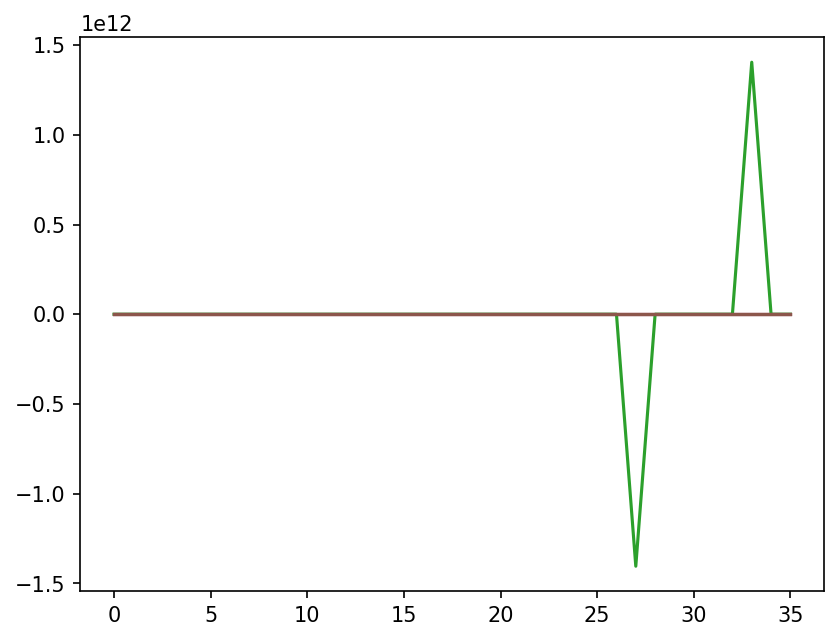

In [60]:
X = np.arange(1, 37).reshape([1, 36])
X
plt.figure(dpi=150)
# plt.plot(X, coef18, 'bo') 
plt.plot(coef16[0])
plt.plot(coef17[0])
plt.plot(coef18[0])
plt.plot(coef19[0])
plt.plot(coef20[0])
plt.plot(coef21[0])

In [61]:
coef18[0]

array([-2.07660609e-02, -1.78995286e-01,  1.94044078e-01, -8.42544236e-02,
        8.58601892e-02, -4.64979789e-01, -1.47760495e-01, -1.11083031e-01,
       -5.50825098e-03,  2.54690734e-03,  1.65664620e-01, -1.13874545e-01,
       -7.22971207e-02, -6.66201739e-02,  9.32076900e-04,  5.16288832e-02,
       -7.25198549e-03,  2.34593581e-01,  2.64363569e-02, -1.47460836e-02,
       -1.58142176e-01,  1.36679838e-01, -4.75709422e-02, -7.91834060e-03,
        1.76378619e-01,  2.43761435e-01,  1.31702971e-01, -1.40449917e+12,
       -3.46357723e-02,  1.94042713e-02,  1.24084485e-01, -2.83959845e+00,
       -2.50995402e-01,  1.40449917e+12, -4.55795673e+00, -6.67226657e-03])

In [62]:
# X_train, X_test, y_train, y_test = train_test_split(x16, y16, test_size = 0.2)
# regressor = LinearRegression()
# regressor.fit(X_train, y_train)
# print(regressor.intercept_)

# XGBoost & SHAP

In [63]:
import xgboost
import shap
from sklearn.inspection import permutation_importance

In [64]:
def kumara(df):
    x, y = df.iloc[:, 3:-1], df.iloc[:, -1]
    model = xgboost.XGBRegressor().fit(x, y)
    explainer = shap.Explainer(model)
    shap_values = explainer(x)
    shap.plots.waterfall(shap_values[0])
    
    shap.plots.beeswarm(shap_values)
    
    shap.plots.bar(shap_values)
    
    shap.plots.bar(shap_values[0])
    
    shap.summary_plot(shap_values, plot_type='violin')
    return

In [65]:
kumara(df16)

ValueError: feature_names must be string, and may not contain [, ] or <

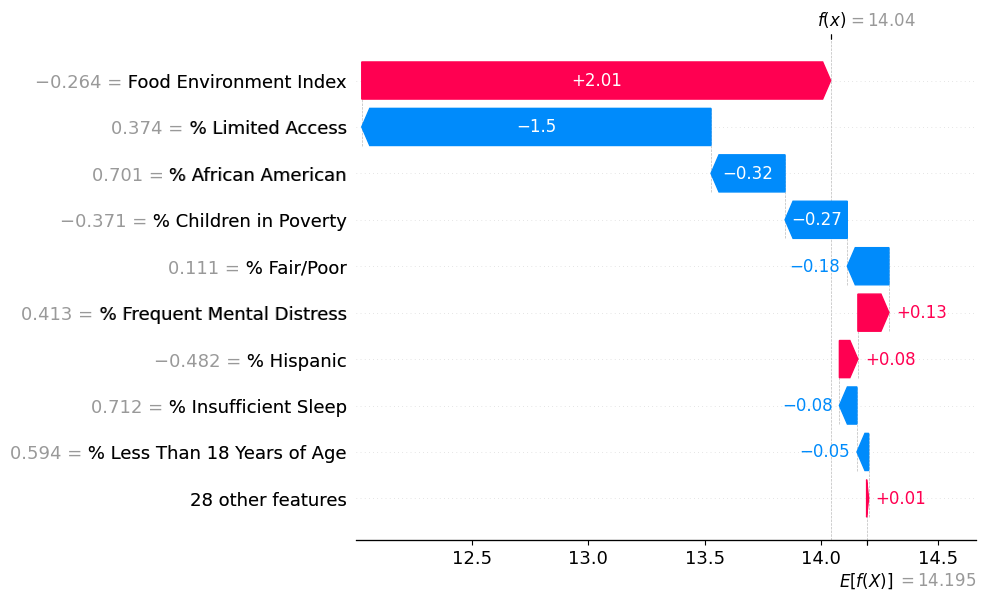

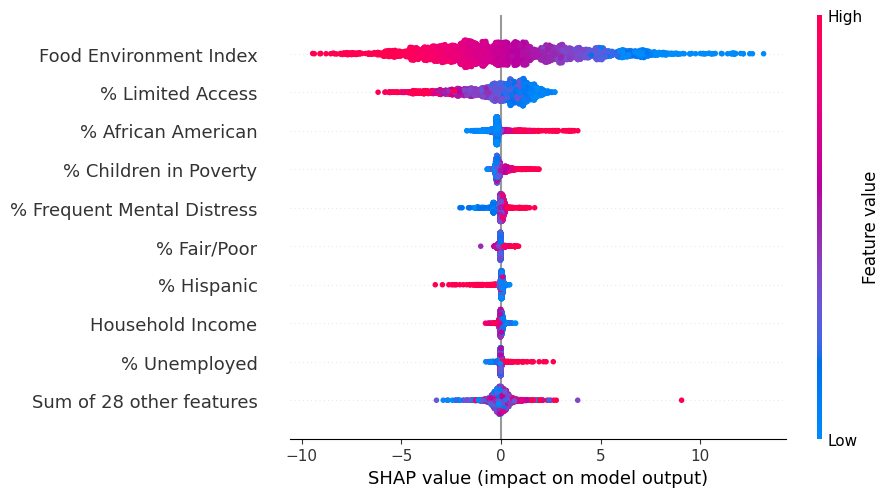

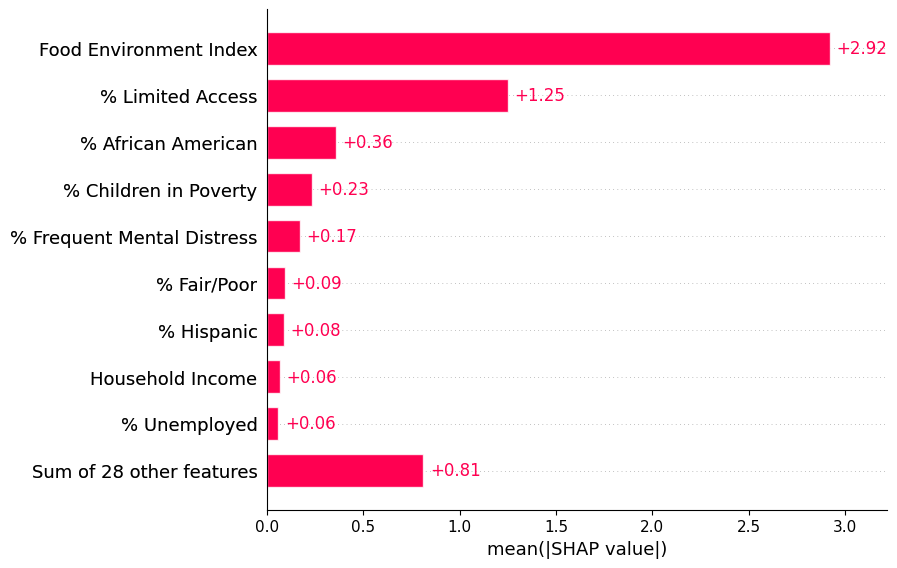

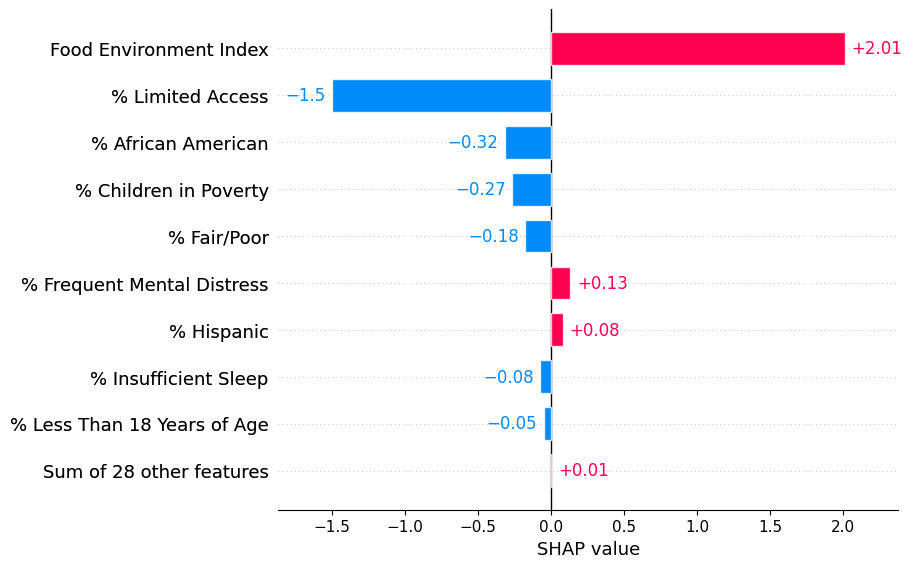

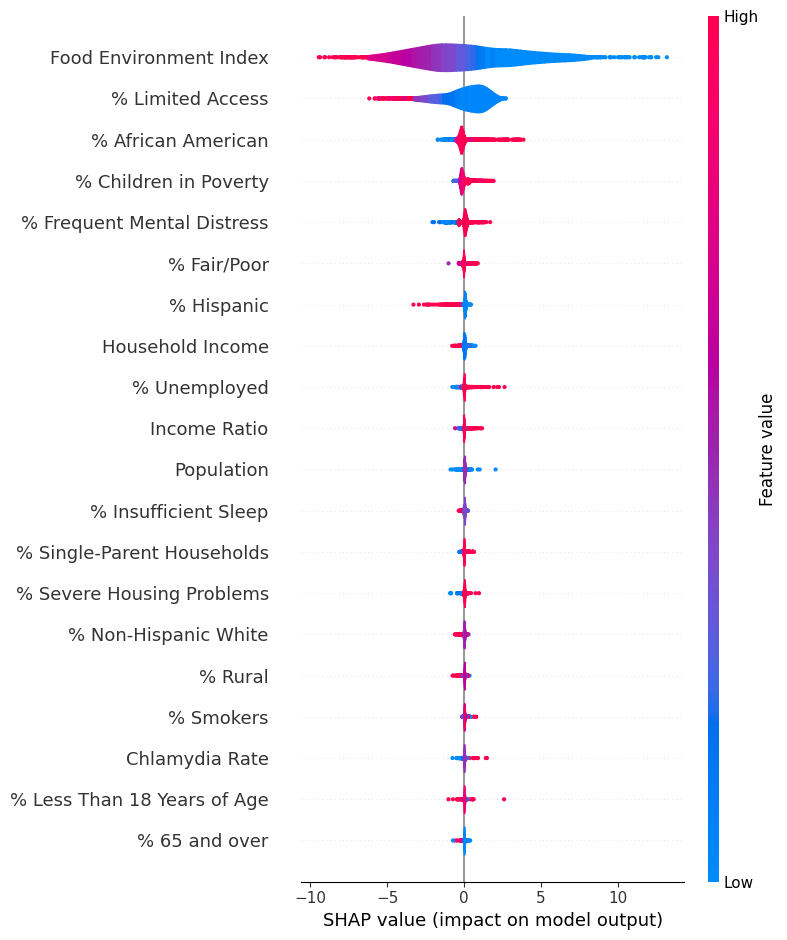

In [53]:
kumara(df17)

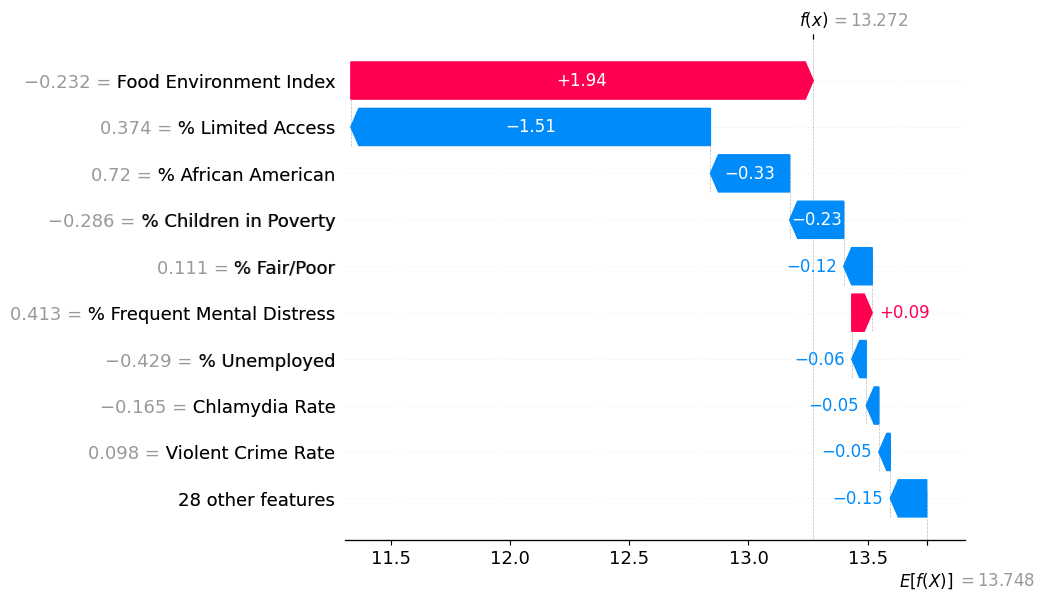

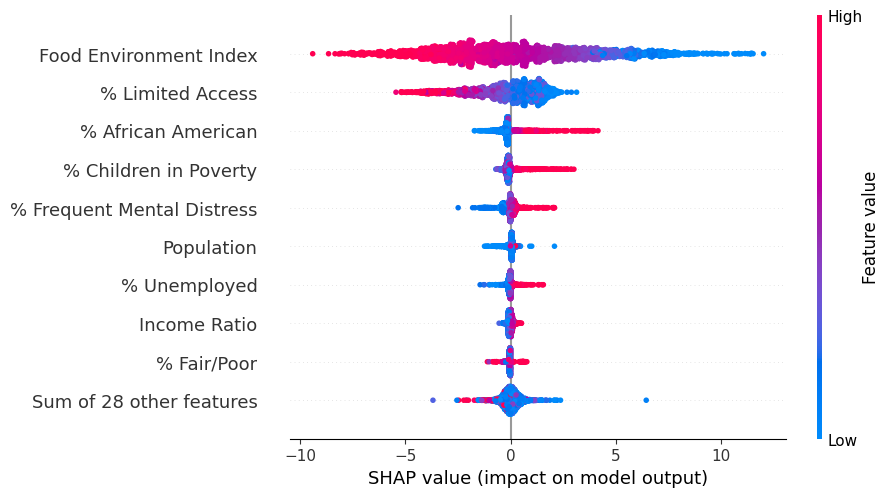

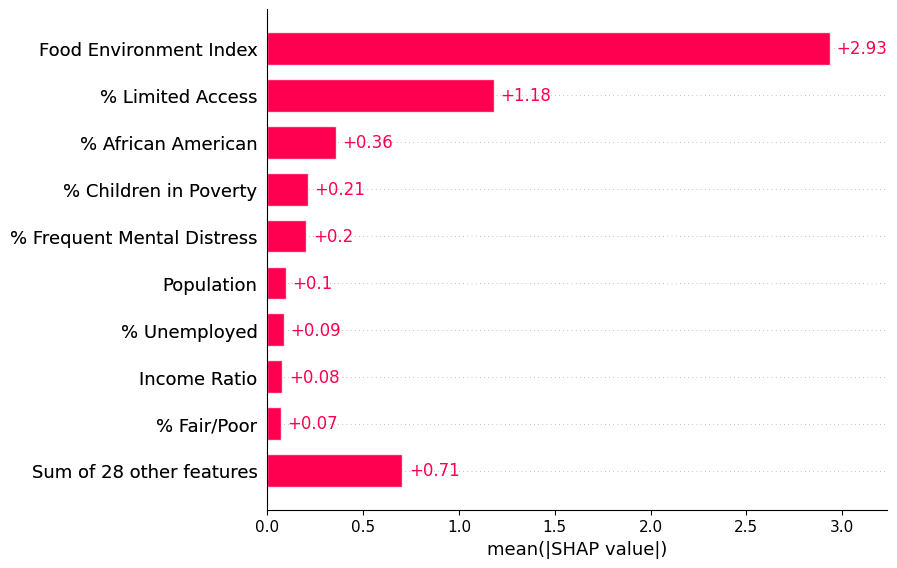

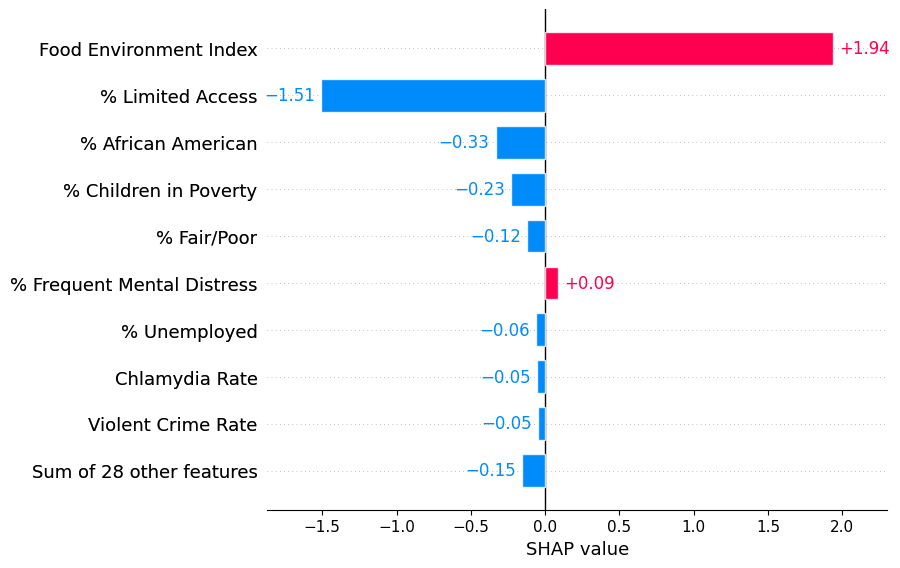

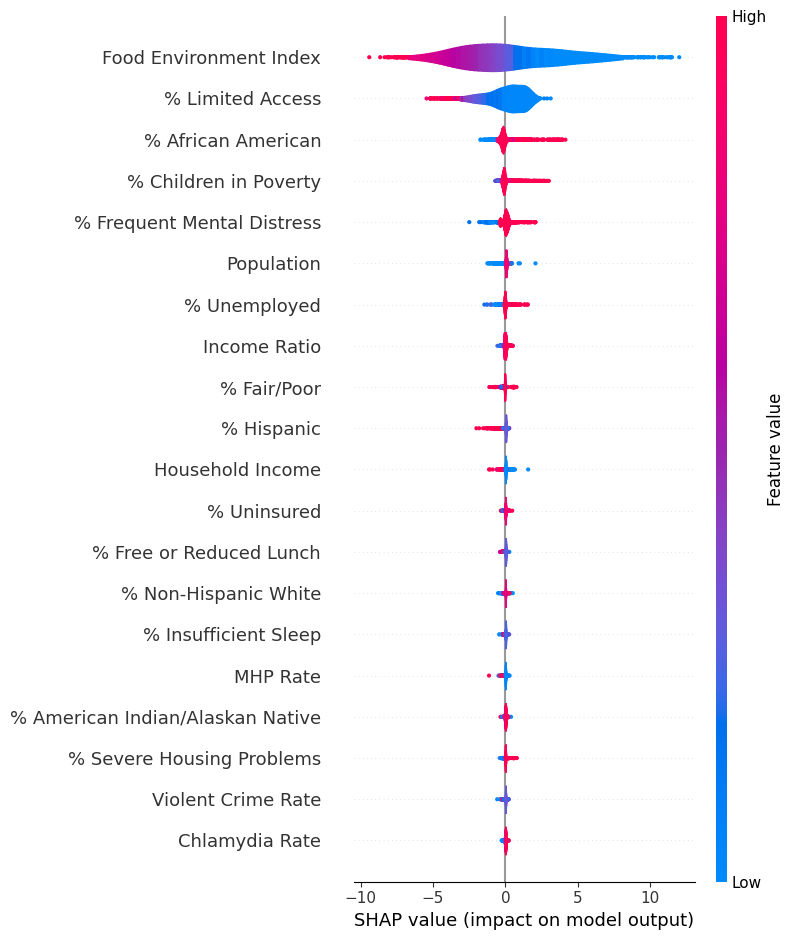

In [54]:
kumara(df18)

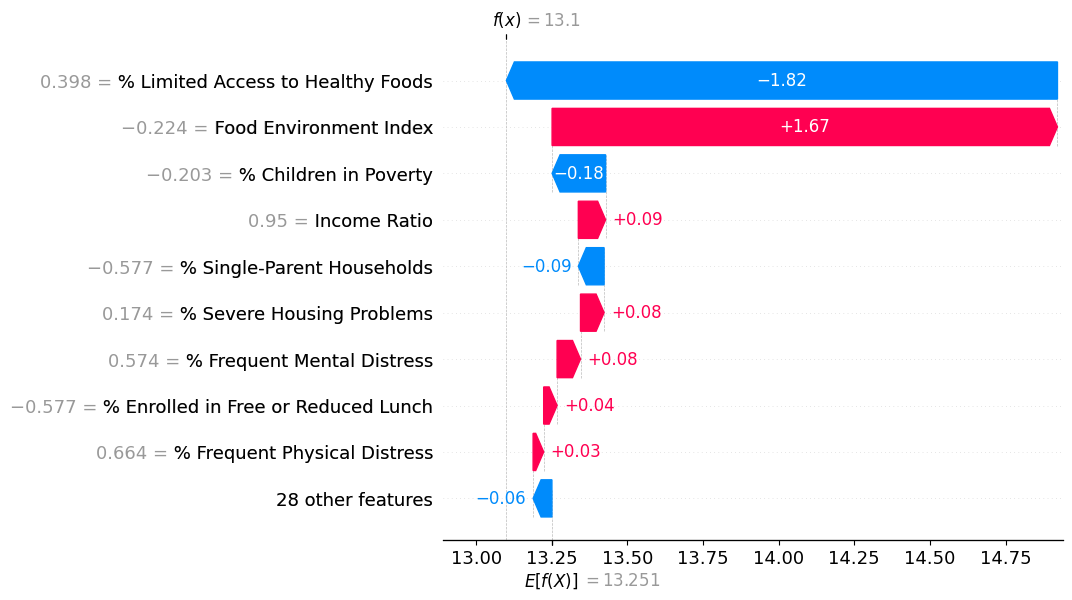

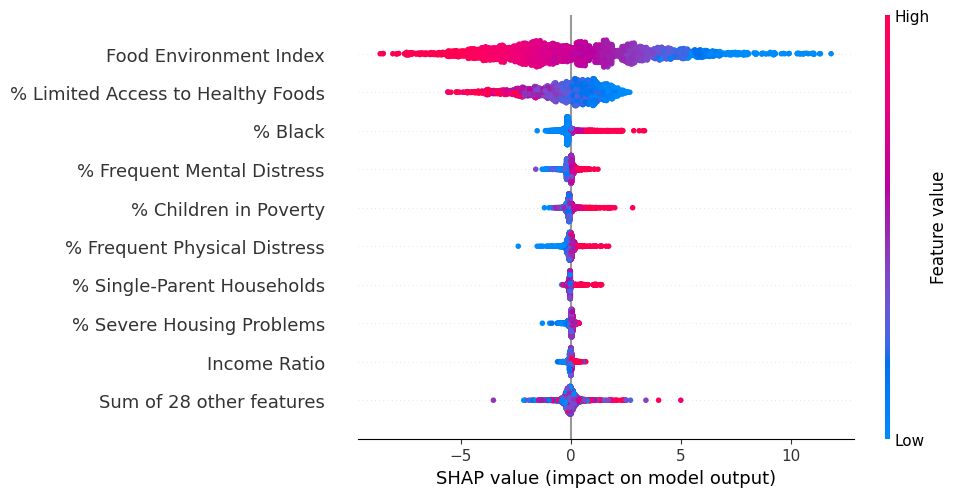

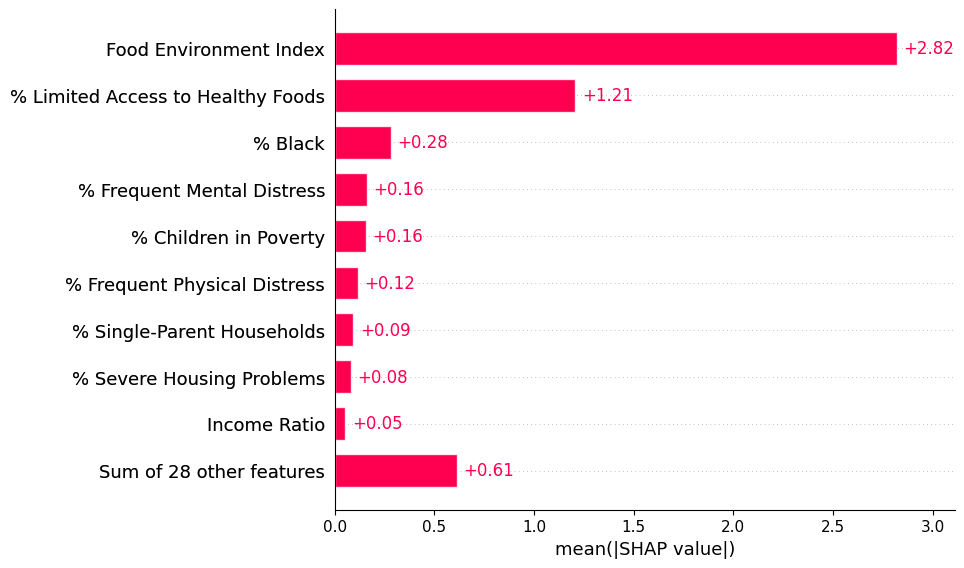

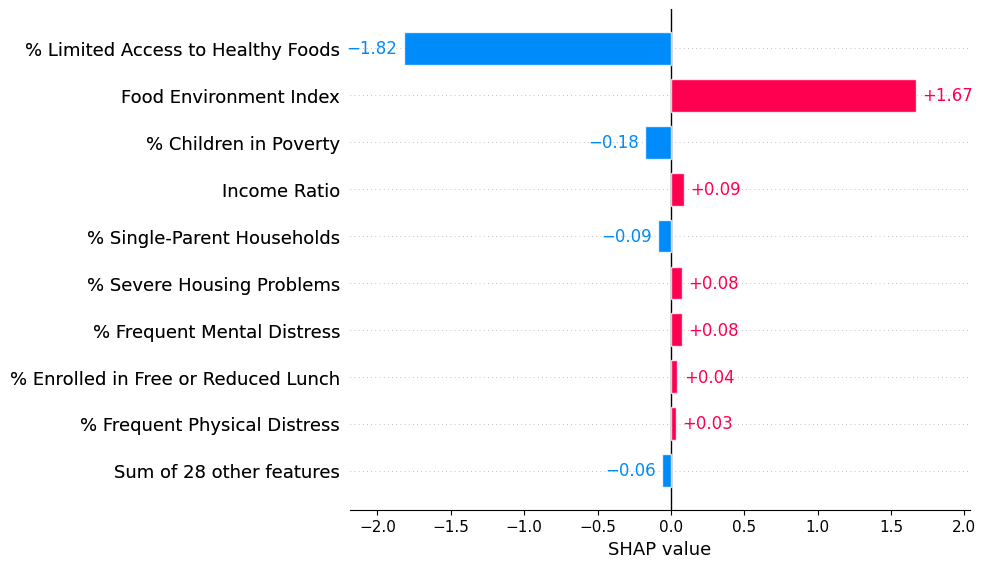

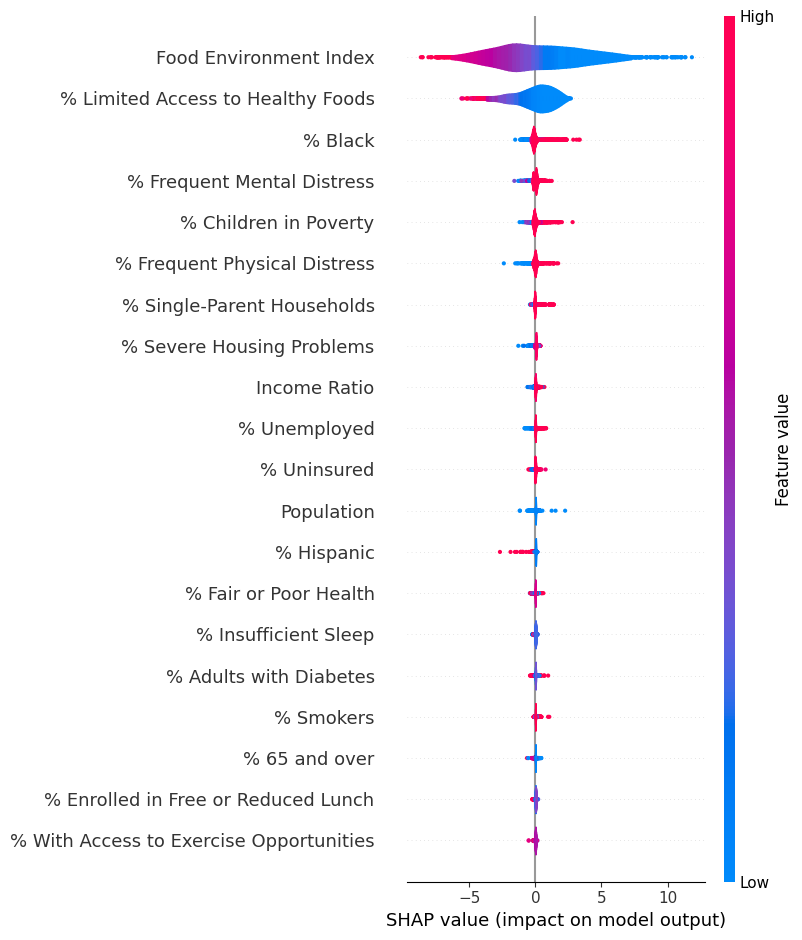

In [55]:
kumara(df19)

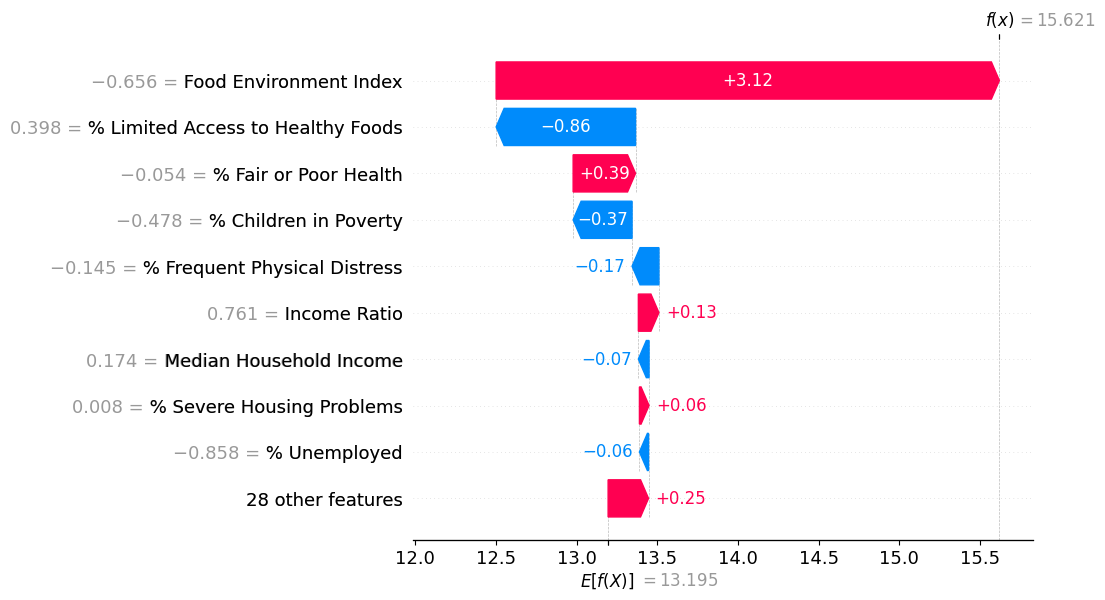

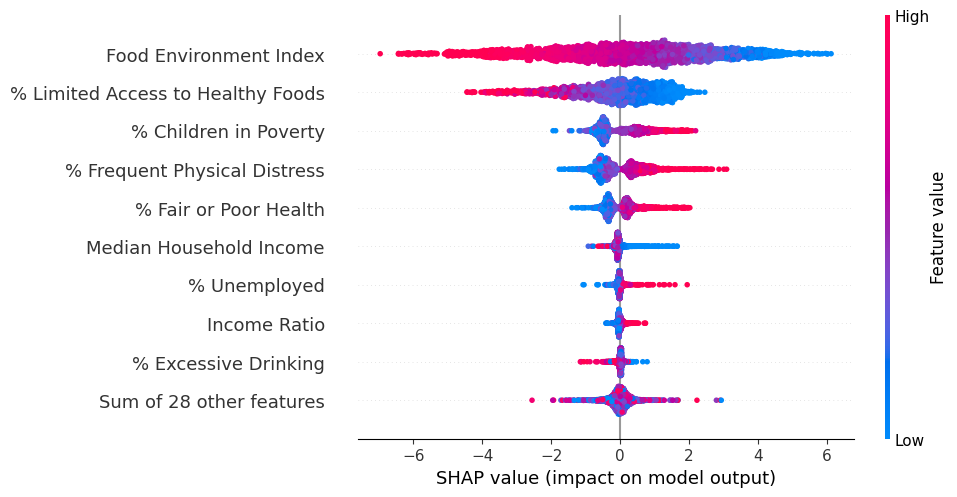

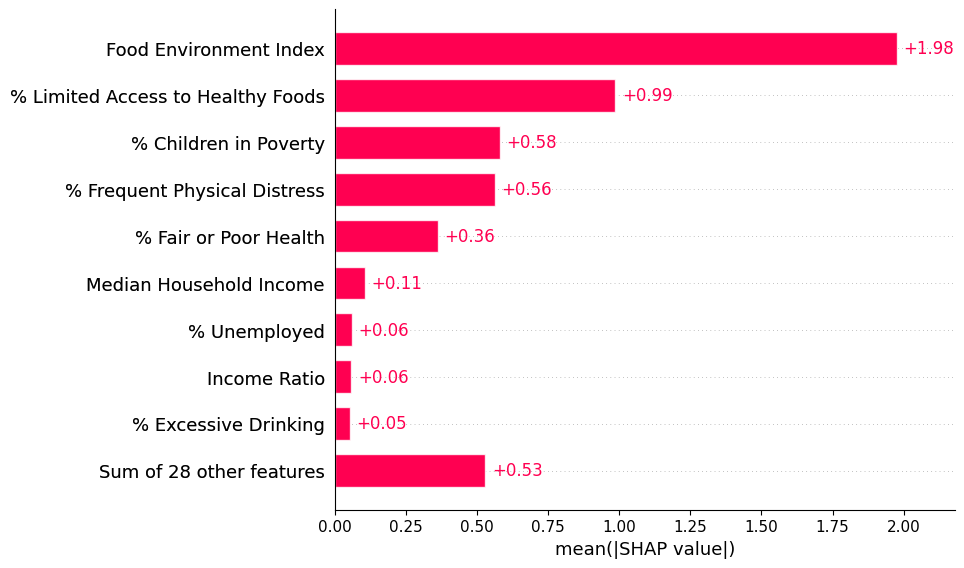

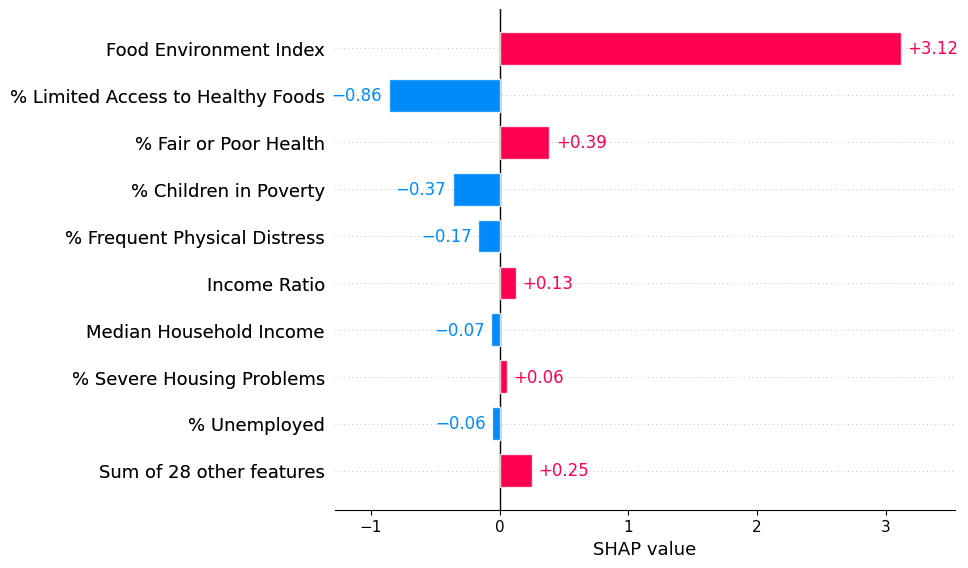

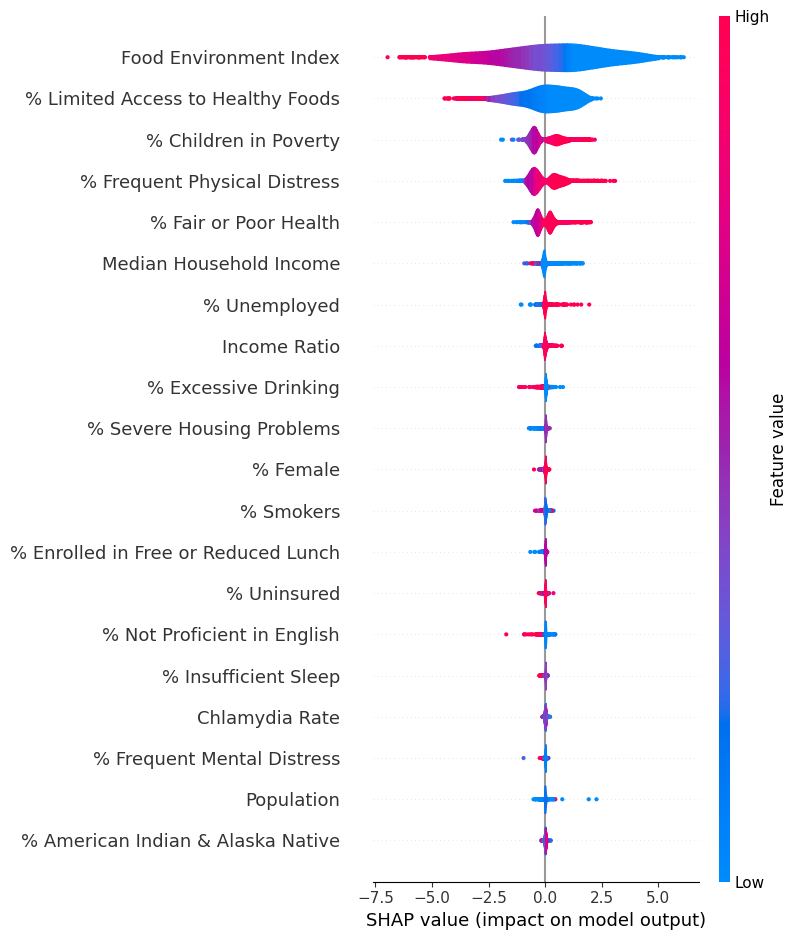

In [56]:
kumara(df20)

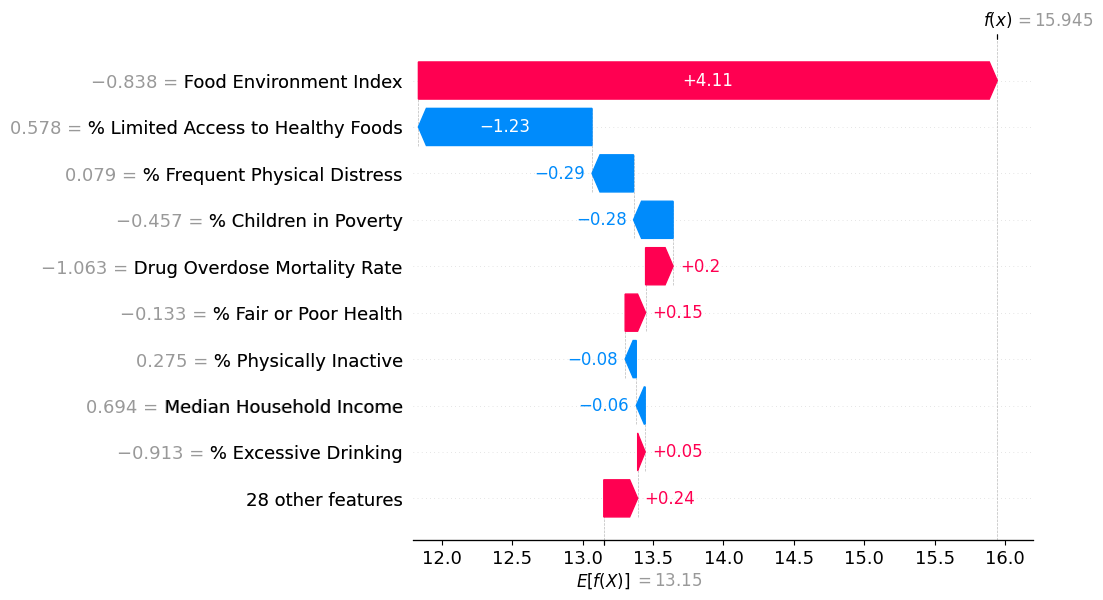

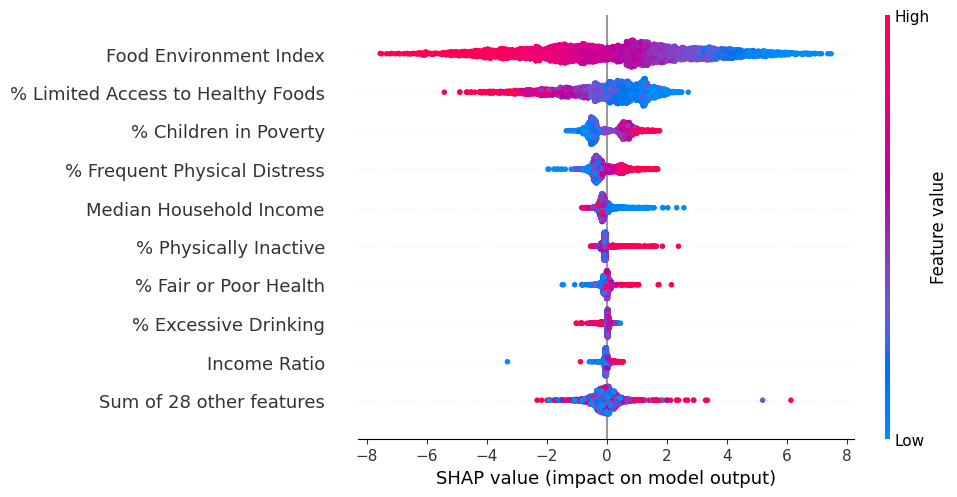

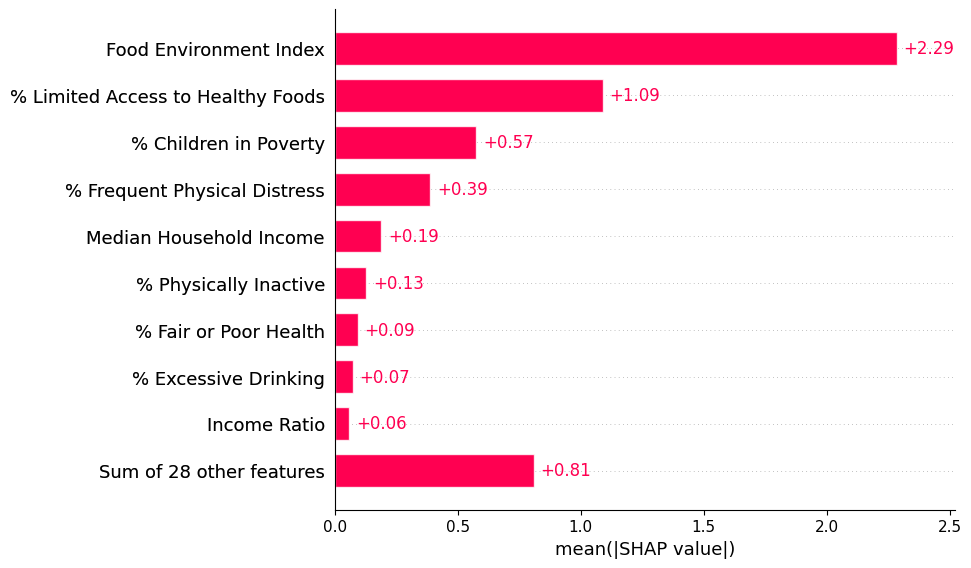

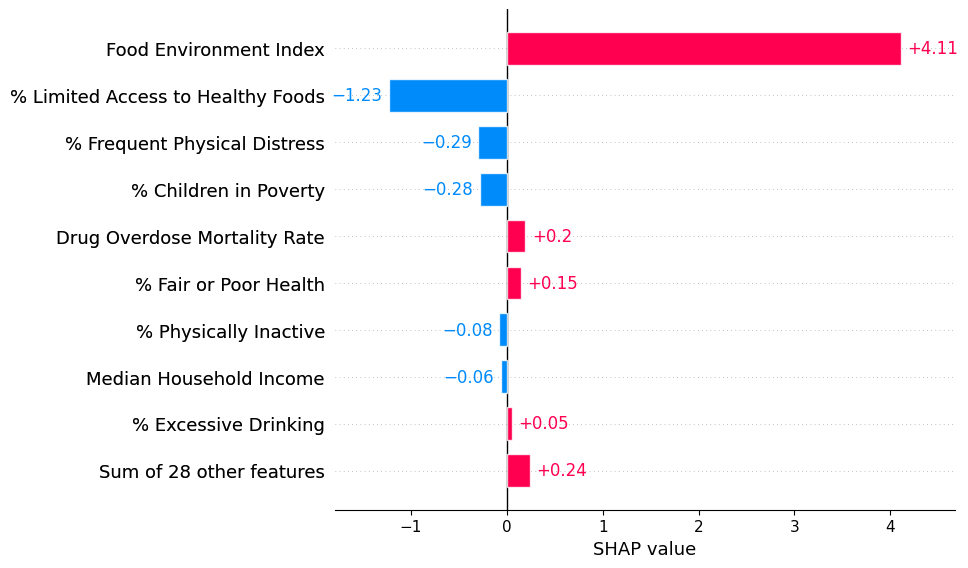

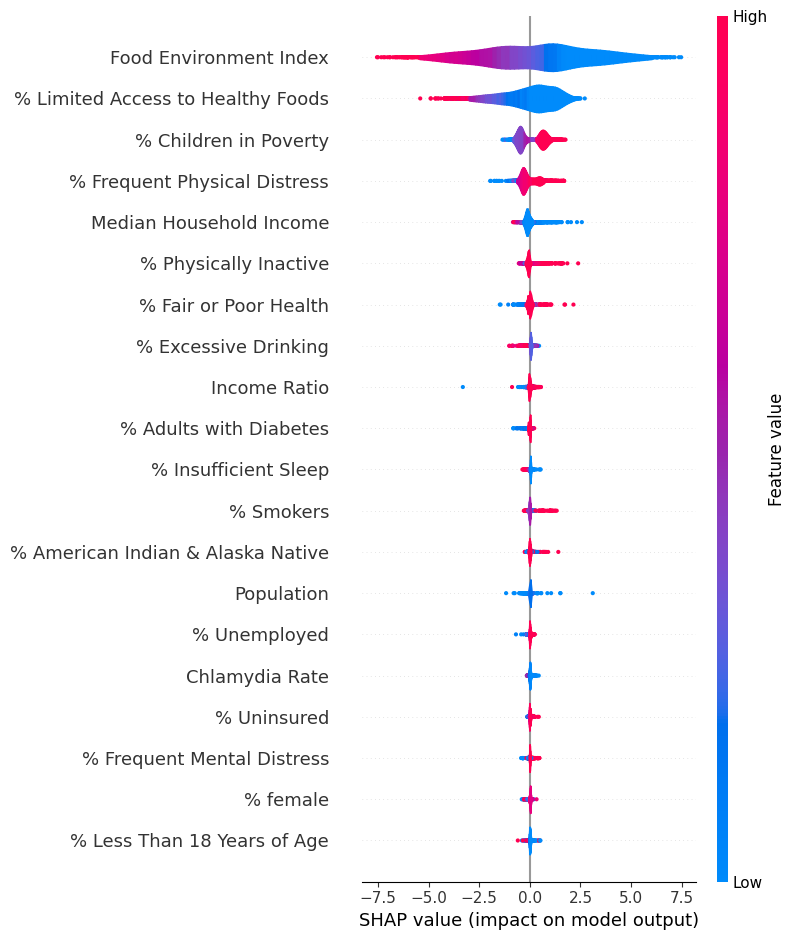

In [57]:
kumara(df21)

In [58]:
# shap.plots.scatter(shap_values[:,"Food Environment Index"], color=shap_values)